# Gale-Shapley (Deferred Acceptance Algorithm)

In [845]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Generate Preferences of Men and Women

In [864]:

n_m = 200 #number of men

n_w = 200 #number of women

# generate utility randomly

a = np.zeros((n_m,n_w+1), dtype=int)
b = np.zeros((n_w,n_m+1), dtype=int)


for i in range(n_m):
    a[i] = np.arange(n_w+1)
    np.random.shuffle(a[i])

for i in range(n_w):
    b[i] = np.arange(n_m+1)
    np.random.shuffle(b[i])
    

men= pd.DataFrame(a)
men.index = ['m' + str(x) for x in men.index]
women = pd.DataFrame(b)
women.index = ['w' + str(x) for x in women.index]
men.columns = list(women.index) + ['self']
women.columns = list(men.index) + ['self']


# you can import or export data here 

'''   
men.to_csv('men.csv')
women.to_csv('women.csv')

men = pd.read_csv('men.csv',index_col=0)
women = pd.read_csv('women.csv',index_col=0)

'''





## 2. Initialize Variables

In [850]:
men_list_include_self = list(women.columns) 
women_list_include_self = list(men.columns)

women_avail = {m: sorted(women_list_include_self,key = lambda x: men.loc[m][x],reverse=True) for m in men.index}

men_avail = list(men.index.copy())

tentative_match = {w: 'self' for w in list(women.index)}

tentative_match_men = {m: 'self' for m in list(men.index)}

men_propose = {}

women_pools = {}


def best_woman_available(m):
    return women_avail[m][0]

def pool_of_men(w):
    return [tentative_match[w]] + [m for m in men_avail if w == men_propose[m]]

## 3. Run the DA Algorithm

In [852]:
while len(men_avail) > 0:
    
    # men proposing
    for m in men_avail:
        men_propose[m] = best_woman_available(m)

    # pool of men for women after proposing
    for w in women.index:
        women_pools[w] = pool_of_men(w)

    # each woman selects the best man possible save tentative matches
    for w in women.index:
        tentative_match[w] = max(women_pools[w], key =lambda x: women.loc[w][x])
        if tentative_match[w] != 'self':
            tentative_match_men[tentative_match[w]] = w

    for m in men_avail:
        if women_avail[m][0] != 'self':
            del women_avail[m][0]  

    men_avail = [m for m in list(men.index) if m not in tentative_match.values() and women_avail[m][0] != 'self']
    
    
    men_propose = {}

    women_pools = {}
    


## 4. Save the Output as a DataFrame

In [853]:
match_women = pd.DataFrame(tentative_match.values(),index = tentative_match.keys(),columns =['match'])

match_men = pd.DataFrame(tentative_match_men.values(), index = tentative_match_men.keys(),columns =['match'])

match_women.insert(1,"utility",[women.loc[w][match_women.loc[w]['match']] 
                                      for w in match_women.index])

match_men.insert(1,"utility",[men.loc[m][match_men.loc[m]['match']] 
                                      for m in match_men.index])

match_women.insert(2, 'ranking', [women.loc[w].rank(ascending = False).astype(int)[match_women.loc[w]['match']] 
                                         for w in match_women.index])

match_men.insert(2, 'ranking', [men.loc[m].rank(ascending = False).astype(int)[match_men.loc[m]['match']] 
                                         for m in match_men.index])


## 5. Data Analysis 

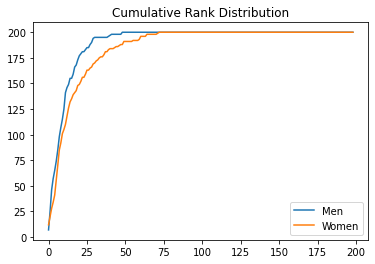

In [854]:
## rank distribution

## single tie-breaking

m_rank_dist = np.cumsum([len(match_men[match_men.ranking == i]) for i in range(1,len(women.index))])

## multi tie-breaking
w_rank_dist = np.cumsum([len(match_women[match_women.ranking == i]) for i in range(1,len(men.index))])



#plot
plt.title('Cumulative Rank Distribution')
plt.plot(m_rank_dist, label='Men')
plt.plot(w_rank_dist, label= 'Women')
plt.legend(loc="lower right")
